<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#particular-cap." data-toc-modified-id="particular-cap.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>particular cap.</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
import taiko as tk
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import posixpath
from skimage.io import imshow, imsave, imread

sns.set(font_scale=2)

USER_PATH = '../data/alpha/chris/'

Using TensorFlow backend.


In [3]:
record_df = pd.read_csv(posixpath.join(USER_PATH, 'day1', 'record_table.csv'))
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,chris,99,L_2018-09-26_132923.csv,R_2018-09-26_132926.csv,capture_2018_09_26_13_29_25
1,chris,1,L_2018-09-26_133059.csv,R_2018-09-26_133100.csv,capture_2018_09_26_13_30_59
2,chris,2,L_2018-09-26_133325.csv,R_2018-09-26_133326.csv,capture_2018_09_26_13_33_25
3,chris,3,L_2018-09-26_133603.csv,R_2018-09-26_133604.csv,capture_2018_09_26_13_36_04
4,chris,4,L_2018-09-26_133921.csv,R_2018-09-26_133922.csv,capture_2018_09_26_13_39_21
5,chris,1,L_2018-09-26_134302.csv,R_2018-09-26_134304.csv,capture_2018_09_26_13_43_03
6,chris,2,L_2018-09-26_134529.csv,R_2018-09-26_134530.csv,capture_2018_09_26_13_45_30
7,chris,3,L_2018-09-26_134825.csv,R_2018-09-26_134827.csv,capture_2018_09_26_13_48_26
8,chris,4,L_2018-09-26_135140.csv,R_2018-09-26_135141.csv,capture_2018_09_26_13_51_41
9,chris,1,L_2018-09-26_135511.csv,R_2018-09-26_135512.csv,capture_2018_09_26_13_55_12


In [4]:
needed_record_df = record_df[(record_df['song_id'] >= 1) & (record_df['song_id'] <= 4)]
needed_record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
1,chris,1,L_2018-09-26_133059.csv,R_2018-09-26_133100.csv,capture_2018_09_26_13_30_59
2,chris,2,L_2018-09-26_133325.csv,R_2018-09-26_133326.csv,capture_2018_09_26_13_33_25
3,chris,3,L_2018-09-26_133603.csv,R_2018-09-26_133604.csv,capture_2018_09_26_13_36_04
4,chris,4,L_2018-09-26_133921.csv,R_2018-09-26_133922.csv,capture_2018_09_26_13_39_21
5,chris,1,L_2018-09-26_134302.csv,R_2018-09-26_134304.csv,capture_2018_09_26_13_43_03
6,chris,2,L_2018-09-26_134529.csv,R_2018-09-26_134530.csv,capture_2018_09_26_13_45_30
7,chris,3,L_2018-09-26_134825.csv,R_2018-09-26_134827.csv,capture_2018_09_26_13_48_26
8,chris,4,L_2018-09-26_135140.csv,R_2018-09-26_135141.csv,capture_2018_09_26_13_51_41
9,chris,1,L_2018-09-26_135511.csv,R_2018-09-26_135512.csv,capture_2018_09_26_13_55_12
10,chris,2,L_2018-09-26_135725.csv,R_2018-09-26_135726.csv,capture_2018_09_26_13_57_26


In [5]:
for id_, row in needed_record_df.iterrows():
    song_id = row['song_id']
    capture_dir = row['capture_datetime']
    if capture_dir != 'capture_2018_09_26_14_18_35':
        continue
    capture_dir_path = posixpath.join(USER_PATH, 'day1', 'bb_capture', capture_dir)
#     result = tk.read_result_board_info(capture_dir_path)
    timestamps, img_scores = tk.read_score_board_info(capture_dir_path, song_id)
#     print(result)
#     result = tk.get_play_start_time(capture_dir_path)
#     print(result)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: digit_images/training1005-1537942725.1955-0.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: digit_images/training1005-1537942725.1955-1.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: digit_images/training1005-1537942725.1955-2.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: digit_images/training1005-1537942725.1955-3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/bin/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: digit_images/training1005-1537942725.1955-4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


# particular cap.

capture_2018_09_29_19_23_01

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
1


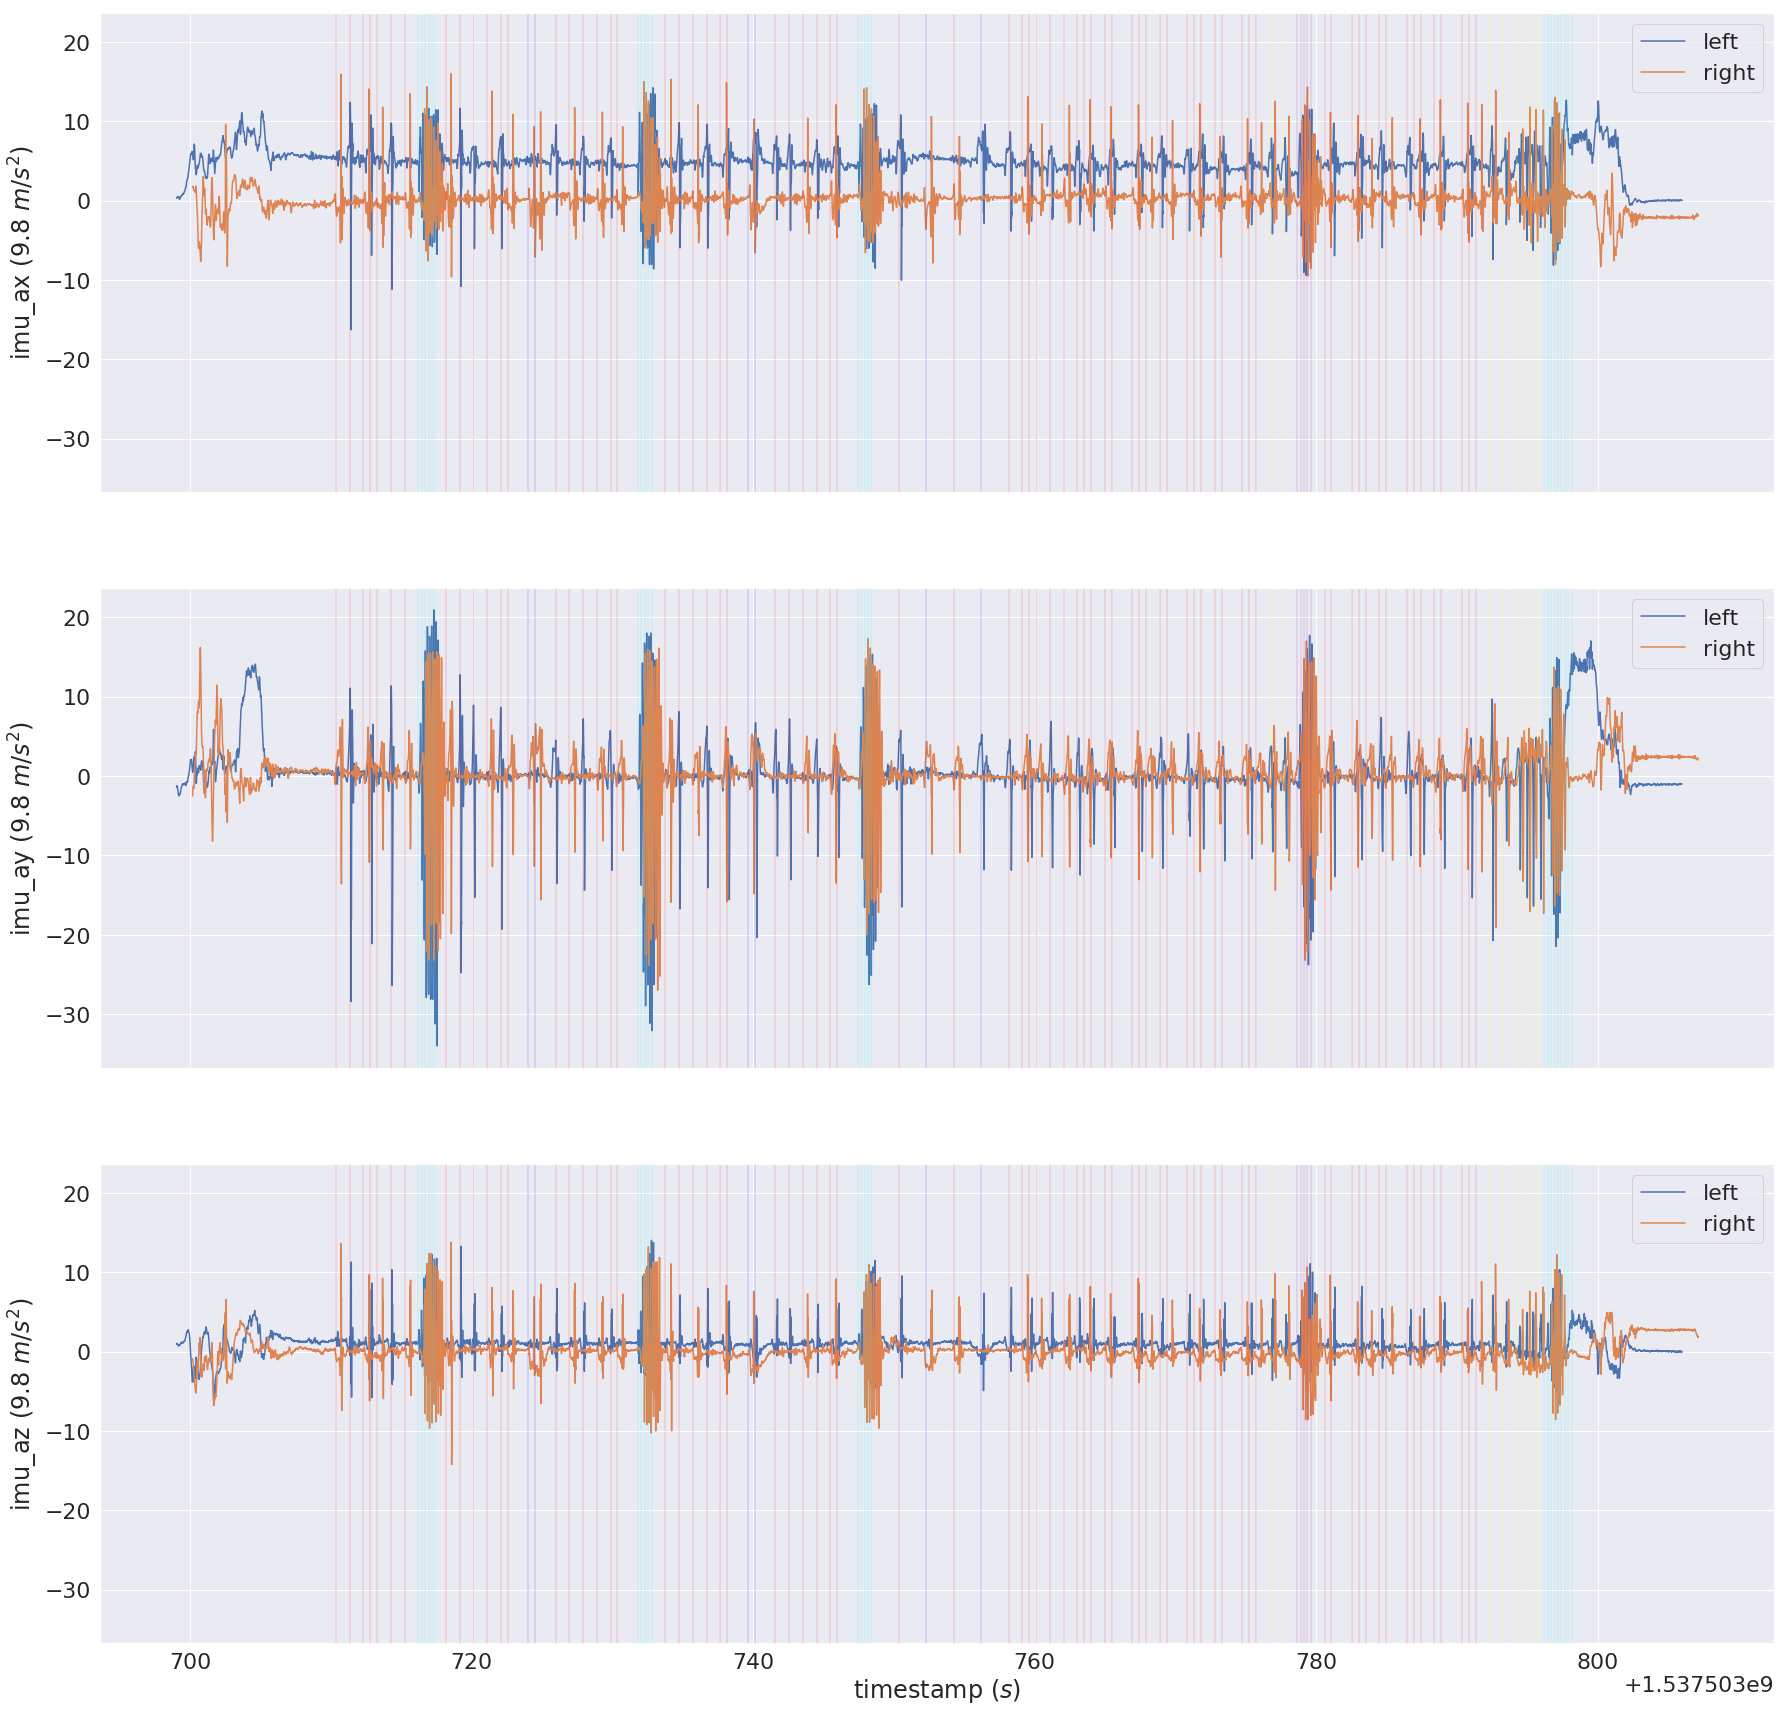

In [5]:
for id_, row in needed_record_df.iterrows():
    if id_ <= 2:
        continue
    if id_ >= 8:
        break
        
    play = tk.get_play(row)
    print(row['song_id'])

    show_cols = tk.ZERO_ADJ_COL[:3]
    fig, axes = plt.subplots(nrows=len(show_cols), ncols=1,
                             sharex=True, sharey=True, figsize=(30, 30))
    for i_, col in enumerate(show_cols):
        sns.lineplot(
            data=play.play_dict['L'], x='timestamp', y=col, label='left', ax=axes[i_])
        sns.lineplot(
            data=play.play_dict['R'], x='timestamp', y=col, label='right', ax=axes[i_])
        axes[i_].set_ylabel(col + ' $(9.8\ m/s^2)$')
        events = play.events
        for id_, _ in enumerate(events):
            event_time = events[id_][0]
            hit_type = events[id_][1]
            if hit_type > 0:
                axes[i_].axvline(
                    event_time, color=tk.COLORS[hit_type], alpha=1, lw=0.2)
    plt.xlabel('timestamp $(s)$')
    plt.show()